### 3. Advanced_merging_and_concatenating

#### Performing an anti join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The top_cust and employees tables have been provided for you.

In [10]:
import pandas as pd
employees = pd.read_csv('datasets/employees.csv')
top_cust = pd.read_csv('datasets/top_cust.csv')

print(employees.head())
print(top_cust.head())

   srid    lname     fname                title   hire_date  \
0     1    Adams    Andrew      General Manager  2002-08-14   
1     2  Edwards     Nancy        Sales Manager  2002-05-01   
2     3  Peacock      Jane  Sales Support Agent  2002-04-01   
3     4     Park  Margaret  Sales Support Agent  2003-05-03   
4     5  Johnson     Steve  Sales Support Agent  2003-10-17   

                      email  
0    andrew@chinookcorp.com  
1     nancy@chinookcorp.com  
2      jane@chinookcorp.com  
3  margaret@chinookcorp.com  
4     steve@chinookcorp.com  
   cid  srid      fname        lname               phone                 fax  \
0    1     3       Luís    Gonçalves  +55 (12) 3923-5555  +55 (12) 3923-5566   
1    2     5     Leonie       Köhler    +49 0711 2842222                 NaN   
2    3     3   François     Tremblay   +1 (514) 721-4711                 NaN   
3    4     4      Bjørn       Hansen     +47 22 44 22 22                 NaN   
4    5     4  František  Wichterlová    +

#### Instructions 1/3

Merge employees and top_cust with a left join, setting indicator argument to True. Save the result to empl_cust.

In [4]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid',
                       how='left', indicator=True)

display(empl_cust)

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,5,Johnson,Steve,Sales Support Agent,2003-10-17,steve@chinookcorp.com,54.0,Steve,Murray,+44 0131 315 3300,NaN,steve.murray@yahoo.uk,both
60,5,Johnson,Steve,Sales Support Agent,2003-10-17,steve@chinookcorp.com,57.0,Luis,Rojas,+56 (0)2 635 4444,NaN,luisrojas@yahoo.cl,both
61,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
62,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
# Merge employees and top_cust
empl_cust = ____.merge(____, on=____,
                       how=____, indicator=____)

#### Instructions 2/3

Select the srid column of empl_cust and the rows where _merge is 'left_only'. Save the result to srid_list.

In [5]:
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']
display(srid_list)

0     1
1     2
61    6
62    7
63    8
Name: srid, dtype: int64

In [ ]:
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[____, 'srid']

#### Instructions 3/3

Subset the employees table and select those rows where the srid is in the variable srid_list and print the results.

In [9]:
# Get employees not working with top customers
display(employees[employees['srid'].isin(srid_list)])

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04,laura@chinookcorp.com


In [ ]:
# Get employees not working with top customers
print(employees[____.isin(____)])

### Success! 

You performed an anti join by first merging the tables with a left join, selecting the ID of those employees who did not support a top customer, and then subsetting the original employee's table. From that, we can see that there are five employees not supporting top customers. Anti joins are a powerful tool to filter a main table (i.e. employees) by another (i.e. customers).

### Performing a semi join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks..

The tables non_mus_tcks, top_invoices, and genres have been loaded for you.

In [1]:
import pandas as pd
non_mus_tcks = pd.read_csv('datasets/non_mus_tcks.csv')
top_invoices = pd.read_csv('datasets/top_invoices.csv')
genres = pd.read_csv('datasets/genres.csv')

#### Instructions

- Merge non_mus_tcks and top_invoices on tid using an inner join. Save the result as tracks_invoices.
- Use .isin() to subset the rows of non_mus_tck where tid is in the tid column of tracks_invoices. Save the result as top_tracks.
- Group top_tracks by gid and count the tid rows. Save the result to cnt_by_gid.
- Merge cnt_by_gid with the genres table on gid and print the result.



In [3]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid', how='inner')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on='gid', how='inner'))

   gid  tid      name
0   19    4  TV Shows
1   21    2     Drama
2   22    1    Comedy


In [ ]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = ____.merge(____)

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = _____[non_mus_tcks['tid'].isin(____)]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':____})

# Merge the genres table to cnt_by_gid on gid and print
print(____)

### Concatenation basics
You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the .concat() method by concatenating the tables vertically together in different ways.

The tables tracks_master, tracks_ride, and tracks_st have loaded for you.

In [4]:
import pandas as pd
tracks_master = pd.read_csv('datasets/tracks_master.csv')
tracks_ride = pd.read_csv('datasets/tracks_ride.csv')
tracks_st = pd.read_csv('datasets/tracks_st.csv')

#### Instructions 1/3

Concatenate tracks_master, tracks_ride, and tracks_st, in that order, setting sort to True.

In [5]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
0  154                  NaN    3     1     Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1       Ride The Lightning  1875     0.99
2  154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
3  154                  NaN    3     1            Fade To Black  1877     0.99
4  154                  NaN    3     1        Trapped Under Ice  1878     0.99
0  155                  NaN    3     1                  Frantic  1882     0.99
1  155                  NaN    3     1                St. Anger  1883     0.99
2  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
3  155                  NaN    3     1             D

In [ ]:
# Concatenate the tracks
tracks_from_albums = pd.concat(____,
                               sort=True)
print(tracks_from_albums)

2. Concatenate tracks_master, tracks_ride, and tracks_st, where the index goes from 0 to n-1.

In [ ]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([____],
                               ____,
                               sort=True)
print(tracks_from_albums)

In [6]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums)

    aid             composer  gid  mtid                     name   tid  \
0   152  J.Hetfield/L.Ulrich    3     1                  Battery  1853   
1   152            K.Hammett    3     1        Master Of Puppets  1854   
2   152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857   
3   154                  NaN    3     1     Fight Fire With Fire  1874   
4   154                  NaN    3     1       Ride The Lightning  1875   
5   154                  NaN    3     1  For Whom The Bell Tolls  1876   
6   154                  NaN    3     1            Fade To Black  1877   
7   154                  NaN    3     1        Trapped Under Ice  1878   
8   155                  NaN    3     1                  Frantic  1882   
9   155                  NaN    3     1                St. Anger  1883   
10  155                  NaN    3     1     Some Kind Of Monster  1884   
11  155                  NaN    3     1             Dirty Window  1885   
12  155                  NaN    3     

3. Concatenate tracks_master, tracks_ride, and tracks_st, showing only columns that are in all tables.

In [ ]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat(____,
                               ____,
                               sort=True)
print(tracks_from_albums)

In [7]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)

   aid  gid  mtid                     name   tid  u_price
0  152    3     1                  Battery  1853     0.99
1  152    3     1        Master Of Puppets  1854     0.99
2  152    3     1        Disposable Heroes  1857     0.99
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99


Great job! You've concatenated your first set of tables, adjusted the index, and altered the columns shown in the output. The .concat() method is a very flexible tool that is useful for combining data into a new dataset.

#### Concatenating with keys
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named inv_jul, inv_aug, and inv_sep. Concatenate these tables into one to create a graph of the average monthly invoice total.

In [9]:
import pandas as pd
inv_jul = pd.read_csv('datasets/inv_jul.csv')
inv_aug = pd.read_csv('datasets/inv_aug.csv')
inv_sep = pd.read_csv('datasets/inv_sep.csv')

- Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months, and save to variable avg_inv_by_month.
- Use the .agg() method to find the average of the total column from the grouped invoices.
- Create a bar chart of avg_inv_by_month.

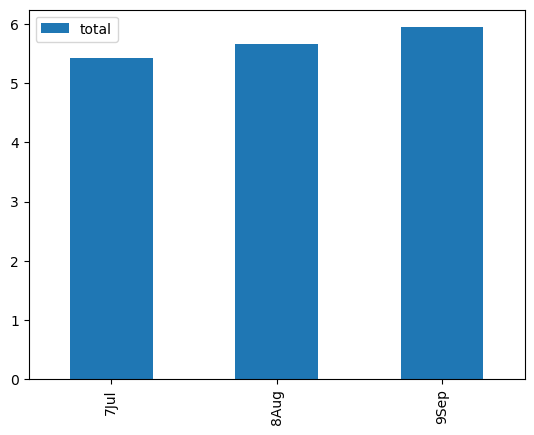

In [15]:
import matplotlib.pyplot as plt
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep],
                            keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

In [ ]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat(____,
                            keys=____)

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg(____)

# Bar plot of avg_inv_by_month
avg_inv_by_month.____
plt.show()

### Concatenate and merge to find common songs
The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

The tables classic_18, classic_19, and pop_18, pop_19 have been loaded for you. Additionally, pandas has been loaded as pd.

In [16]:
import pandas as pd
classic_18 = pd.read_csv('datasets/classic_18.csv')
classic_19 = pd.read_csv('datasets/classic_19.csv')
pop_18 = pd.read_csv('datasets/pop_18.csv')
pop_19 = pd.read_csv('datasets/pop_19.csv')

#### Instructions 1/2

1. Concatenate the classic_18 and classic_19 tables vertically where the index goes from 0 to n-1, and save to classic_18_19.
2. Concatenate the pop_18 and pop_19 tables vertically where the index goes from 0 to n-1, and save to pop_18_19.

In [20]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

In [ ]:
# Concatenate the classic tables vertically
classic_18_19 = ____

# Concatenate the pop tables vertically
pop_18_19 = ____

#### Instructions 2/2

- With classic_18_19 on the left, merge it with pop_18_19 on tid using an inner join.
- Use .isin() to filter classic_18_19 where tid is in classic_pop.

In [ ]:
# Merge classic_18_19 with pop_18_19
classic_pop = ____

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19[____].isin(____)]

# Print popular chart
print(popular_classic)

In [21]:
# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid', how='inner')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

    pid   tid
3    12  3479
10   12  3439
21   12  3445
23   12  3449
48   12  3437
50   12  3435
